# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

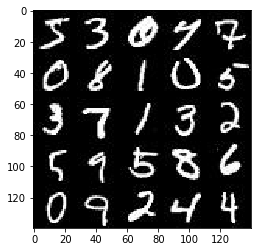

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

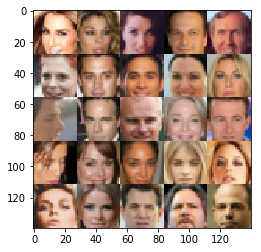

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.0


/Users/kelvin/anaconda/envs/tensorflow/lib/python3.5/site-packages/ipykernel/__main__.py:14: UserWarning: No GPU found. Please use a GPU to train your neural network.


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    inputs_real = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), name = "input_real" )
    inputs_z = tf.placeholder(tf.float32, (None, z_dim), name = "input_z" )
    learning_rate = tf.placeholder(tf.float32, (), name = "learn_rate" )
    
    return (inputs_real, inputs_z, learning_rate)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the generator, tensor logits of the generator).

In [6]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param image: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    alpha = 0.2
    with tf.variable_scope('discriminator', reuse=reuse):
            
        # Input 
        #    Num  28x28
        #    Face 28x28x3
        
        x1 = tf.layers.conv2d(images, 64, 5, strides=2, padding='same')
        x1 = tf.maximum(alpha * x1, x1)
      
        x2 = tf.layers.conv2d(x1, 128, 5, strides=2, padding='same')
        x2 = tf.layers.batch_normalization(x2, training = True)
        x2 = tf.maximum(alpha * x2, x2)
      
        x3 = tf.layers.conv2d(x2, 256, 5, strides=2, padding='same')
        x3 = tf.layers.batch_normalization(x3, training = True)
        x3 = tf.maximum(alpha * x3, x3)
      
        flat = tf.reshape(x3, (-1, 4*4*256))
        logits = tf.layers.dense(flat, 1, activation=None)
        out = tf.sigmoid(logits)
        
    return (out, logits)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [7]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
        
    alpha = 0.2
    with tf.variable_scope('generator', reuse=not is_train):
    
        x1 = tf.layers.dense(z, 7*7*512)
        x1 = tf.reshape(x1, (-1, 7, 7, 512))
        x1 = tf.maximum(alpha * x1, x1)
                
        x2 = tf.layers.conv2d_transpose(x1, 256, 5, strides=2, padding='same')
        x2 = tf.layers.batch_normalization(x2, training = is_train)
        x2 = tf.maximum(alpha * x2, x2) 
        
        x3 = tf.layers.conv2d_transpose(x2, 128, 5, strides=2, padding='same')
        x3 = tf.layers.batch_normalization(x3, training = is_train)
        x3 = tf.maximum(alpha * x3, x3) 
        
        logits = tf.layers.conv2d_transpose(x3, out_channel_dim, 3, strides=1, padding='same')
        out = tf.tanh(logits)
        
    return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [8]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    g_output = generator(input_z, out_channel_dim)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_output, reuse=True)
    
    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    
    d_loss = d_loss_real + d_loss_fake
    
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))
    
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [9]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]
   
    d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)
    
    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [10]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [11]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    _, width, height, channels = data_shape
    input_real, input_z, learn_rate = model_inputs(width, height, channels, z_dim)
    d_loss, g_loss = model_loss(input_real, input_z, channels)
    d_opt, g_opt = model_opt(d_loss, g_loss, learn_rate, beta1)
    
    steps = 0
    show_every = 100  #100
    print_every = 10  #100
    n_images = 9
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                
                steps += 1
                
                # sample random noise for G
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))

                # run optimizers
                _ = sess.run(d_opt, feed_dict={input_real: batch_images, input_z: batch_z, learn_rate: learning_rate})
                _ = sess.run(g_opt, feed_dict={input_real: batch_images, input_z: batch_z, learn_rate: learning_rate})

                if steps % print_every == 0:
                    train_loss_d = d_loss.eval({input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z})

                    print("Epoch {}/{} ...".format(epoch_i, epoch_count),
                          "Discriminator Loss: {:.4f} ...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                                
                if steps % show_every == 0:
                    show_generator_output(sess, n_images, input_z, channels, data_image_mode)
                
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 0/2 ... Discriminator Loss: 0.0473 ... Generator Loss: 4.0067
Epoch 0/2 ... Discriminator Loss: 0.1239 ... Generator Loss: 2.4346
Epoch 0/2 ... Discriminator Loss: 0.0446 ... Generator Loss: 3.8508
Epoch 0/2 ... Discriminator Loss: 0.0800 ... Generator Loss: 3.0463
Epoch 0/2 ... Discriminator Loss: 0.0346 ... Generator Loss: 3.7463
Epoch 0/2 ... Discriminator Loss: 0.3821 ... Generator Loss: 2.4249
Epoch 0/2 ... Discriminator Loss: 0.1113 ... Generator Loss: 2.7593
Epoch 0/2 ... Discriminator Loss: 1.5744 ... Generator Loss: 9.3146
Epoch 0/2 ... Discriminator Loss: 0.9809 ... Generator Loss: 1.4881
Epoch 0/2 ... Discriminator Loss: 0.8489 ... Generator Loss: 1.0135


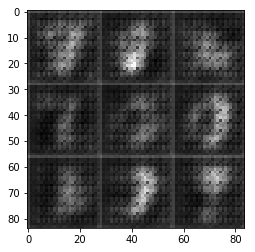

Epoch 0/2 ... Discriminator Loss: 0.6781 ... Generator Loss: 1.2294
Epoch 0/2 ... Discriminator Loss: 0.5926 ... Generator Loss: 2.2880
Epoch 0/2 ... Discriminator Loss: 0.4148 ... Generator Loss: 1.7980
Epoch 0/2 ... Discriminator Loss: 0.2928 ... Generator Loss: 2.4522
Epoch 0/2 ... Discriminator Loss: 0.7501 ... Generator Loss: 0.7779
Epoch 0/2 ... Discriminator Loss: 0.4443 ... Generator Loss: 1.2710
Epoch 0/2 ... Discriminator Loss: 0.4992 ... Generator Loss: 1.2519
Epoch 0/2 ... Discriminator Loss: 0.2453 ... Generator Loss: 3.1346
Epoch 0/2 ... Discriminator Loss: 0.1560 ... Generator Loss: 2.7573
Epoch 0/2 ... Discriminator Loss: 0.0539 ... Generator Loss: 3.4818


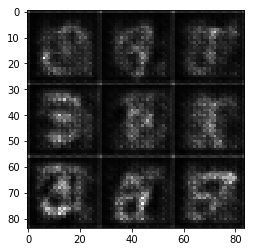

Epoch 0/2 ... Discriminator Loss: 0.0353 ... Generator Loss: 4.7493
Epoch 0/2 ... Discriminator Loss: 0.0629 ... Generator Loss: 4.1247
Epoch 0/2 ... Discriminator Loss: 0.0277 ... Generator Loss: 4.8598
Epoch 0/2 ... Discriminator Loss: 0.0607 ... Generator Loss: 3.3652
Epoch 0/2 ... Discriminator Loss: 0.0152 ... Generator Loss: 5.1375
Epoch 0/2 ... Discriminator Loss: 0.0193 ... Generator Loss: 4.9122
Epoch 0/2 ... Discriminator Loss: 0.0131 ... Generator Loss: 5.2629
Epoch 0/2 ... Discriminator Loss: 0.0217 ... Generator Loss: 4.9300
Epoch 0/2 ... Discriminator Loss: 0.0284 ... Generator Loss: 4.3271
Epoch 0/2 ... Discriminator Loss: 0.0200 ... Generator Loss: 4.3495


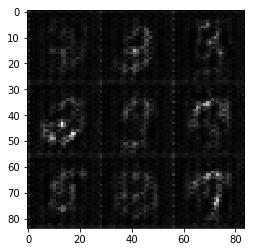

Epoch 0/2 ... Discriminator Loss: 0.6694 ... Generator Loss: 1.4983
Epoch 0/2 ... Discriminator Loss: 0.2898 ... Generator Loss: 2.0524
Epoch 0/2 ... Discriminator Loss: 0.8130 ... Generator Loss: 0.8072
Epoch 0/2 ... Discriminator Loss: 1.4303 ... Generator Loss: 0.4039
Epoch 0/2 ... Discriminator Loss: 0.1651 ... Generator Loss: 2.5249
Epoch 0/2 ... Discriminator Loss: 0.0791 ... Generator Loss: 3.2362
Epoch 0/2 ... Discriminator Loss: 1.8909 ... Generator Loss: 12.1638
Epoch 0/2 ... Discriminator Loss: 3.3027 ... Generator Loss: 12.8989
Epoch 0/2 ... Discriminator Loss: 0.1497 ... Generator Loss: 2.8739
Epoch 0/2 ... Discriminator Loss: 0.1829 ... Generator Loss: 3.0719


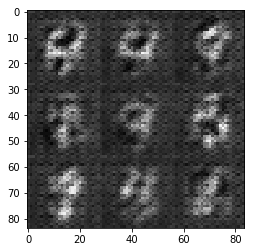

Epoch 0/2 ... Discriminator Loss: 0.0130 ... Generator Loss: 5.8975
Epoch 0/2 ... Discriminator Loss: 0.2165 ... Generator Loss: 2.1081
Epoch 0/2 ... Discriminator Loss: 3.0582 ... Generator Loss: 0.0682
Epoch 0/2 ... Discriminator Loss: 1.6531 ... Generator Loss: 4.3118
Epoch 0/2 ... Discriminator Loss: 0.4791 ... Generator Loss: 1.7395
Epoch 0/2 ... Discriminator Loss: 0.0521 ... Generator Loss: 6.7666
Epoch 0/2 ... Discriminator Loss: 0.1070 ... Generator Loss: 3.8593
Epoch 0/2 ... Discriminator Loss: 0.8429 ... Generator Loss: 5.4758
Epoch 0/2 ... Discriminator Loss: 1.0014 ... Generator Loss: 0.6169
Epoch 0/2 ... Discriminator Loss: 0.2959 ... Generator Loss: 11.4556


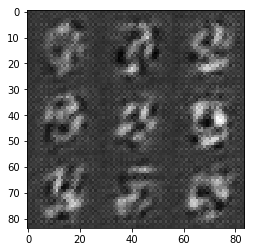

Epoch 0/2 ... Discriminator Loss: 0.0565 ... Generator Loss: 4.7690
Epoch 0/2 ... Discriminator Loss: 0.1925 ... Generator Loss: 7.1077
Epoch 0/2 ... Discriminator Loss: 0.3402 ... Generator Loss: 1.4793
Epoch 0/2 ... Discriminator Loss: 0.0977 ... Generator Loss: 6.1171
Epoch 0/2 ... Discriminator Loss: 0.1923 ... Generator Loss: 2.5045
Epoch 0/2 ... Discriminator Loss: 0.4577 ... Generator Loss: 3.8222
Epoch 0/2 ... Discriminator Loss: 1.4119 ... Generator Loss: 0.3956
Epoch 0/2 ... Discriminator Loss: 0.5576 ... Generator Loss: 1.0719
Epoch 0/2 ... Discriminator Loss: 0.2105 ... Generator Loss: 2.1843
Epoch 0/2 ... Discriminator Loss: 0.3287 ... Generator Loss: 8.6089


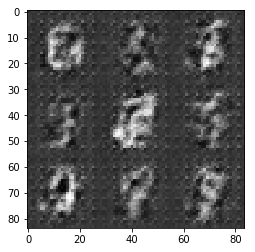

Epoch 0/2 ... Discriminator Loss: 1.1682 ... Generator Loss: 0.5212
Epoch 0/2 ... Discriminator Loss: 0.1920 ... Generator Loss: 5.5985
Epoch 0/2 ... Discriminator Loss: 0.0739 ... Generator Loss: 5.0164
Epoch 0/2 ... Discriminator Loss: 0.1818 ... Generator Loss: 4.8084
Epoch 0/2 ... Discriminator Loss: 0.1528 ... Generator Loss: 3.1958
Epoch 0/2 ... Discriminator Loss: 0.0689 ... Generator Loss: 5.3670
Epoch 0/2 ... Discriminator Loss: 0.4744 ... Generator Loss: 1.4354
Epoch 0/2 ... Discriminator Loss: 0.0687 ... Generator Loss: 4.3907
Epoch 0/2 ... Discriminator Loss: 0.1784 ... Generator Loss: 2.3893
Epoch 0/2 ... Discriminator Loss: 0.0313 ... Generator Loss: 6.0534


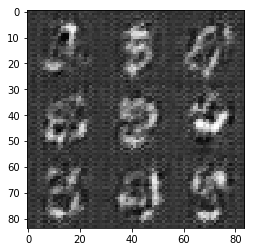

Epoch 0/2 ... Discriminator Loss: 0.1422 ... Generator Loss: 2.5629
Epoch 0/2 ... Discriminator Loss: 0.6604 ... Generator Loss: 0.9185
Epoch 0/2 ... Discriminator Loss: 0.3527 ... Generator Loss: 11.0182
Epoch 0/2 ... Discriminator Loss: 0.2640 ... Generator Loss: 2.4795
Epoch 0/2 ... Discriminator Loss: 0.5808 ... Generator Loss: 4.9530
Epoch 0/2 ... Discriminator Loss: 0.4253 ... Generator Loss: 4.2994
Epoch 0/2 ... Discriminator Loss: 0.2655 ... Generator Loss: 4.8789
Epoch 0/2 ... Discriminator Loss: 0.4248 ... Generator Loss: 4.7087
Epoch 0/2 ... Discriminator Loss: 0.0330 ... Generator Loss: 4.5227
Epoch 0/2 ... Discriminator Loss: 0.1593 ... Generator Loss: 2.5929


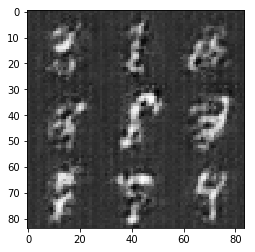

Epoch 0/2 ... Discriminator Loss: 0.1075 ... Generator Loss: 3.0528
Epoch 0/2 ... Discriminator Loss: 0.0583 ... Generator Loss: 4.1180
Epoch 0/2 ... Discriminator Loss: 0.0266 ... Generator Loss: 5.6296
Epoch 0/2 ... Discriminator Loss: 0.1791 ... Generator Loss: 6.8795
Epoch 0/2 ... Discriminator Loss: 0.0478 ... Generator Loss: 7.2737
Epoch 0/2 ... Discriminator Loss: 0.6343 ... Generator Loss: 1.1709
Epoch 0/2 ... Discriminator Loss: 0.3670 ... Generator Loss: 4.1760
Epoch 0/2 ... Discriminator Loss: 0.1645 ... Generator Loss: 2.5182
Epoch 0/2 ... Discriminator Loss: 0.0709 ... Generator Loss: 3.3730
Epoch 0/2 ... Discriminator Loss: 0.0721 ... Generator Loss: 4.1707


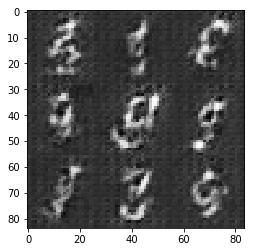

Epoch 0/2 ... Discriminator Loss: 0.2504 ... Generator Loss: 3.8913
Epoch 0/2 ... Discriminator Loss: 0.1825 ... Generator Loss: 2.2558
Epoch 0/2 ... Discriminator Loss: 0.1770 ... Generator Loss: 2.4869
Epoch 1/2 ... Discriminator Loss: 0.0276 ... Generator Loss: 4.8969
Epoch 1/2 ... Discriminator Loss: 0.0244 ... Generator Loss: 5.1248
Epoch 1/2 ... Discriminator Loss: 0.3703 ... Generator Loss: 1.6000
Epoch 1/2 ... Discriminator Loss: 0.4851 ... Generator Loss: 1.3650
Epoch 1/2 ... Discriminator Loss: 0.3838 ... Generator Loss: 1.4616
Epoch 1/2 ... Discriminator Loss: 0.2454 ... Generator Loss: 2.3057
Epoch 1/2 ... Discriminator Loss: 0.3057 ... Generator Loss: 1.7412


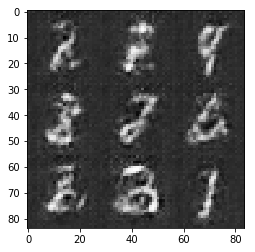

Epoch 1/2 ... Discriminator Loss: 0.1331 ... Generator Loss: 2.4905
Epoch 1/2 ... Discriminator Loss: 0.1130 ... Generator Loss: 2.6689
Epoch 1/2 ... Discriminator Loss: 0.1587 ... Generator Loss: 2.2475
Epoch 1/2 ... Discriminator Loss: 0.0578 ... Generator Loss: 3.5436
Epoch 1/2 ... Discriminator Loss: 0.0642 ... Generator Loss: 3.3823
Epoch 1/2 ... Discriminator Loss: 0.1228 ... Generator Loss: 2.5128
Epoch 1/2 ... Discriminator Loss: 0.1365 ... Generator Loss: 2.5838
Epoch 1/2 ... Discriminator Loss: 0.0837 ... Generator Loss: 3.1408
Epoch 1/2 ... Discriminator Loss: 0.0977 ... Generator Loss: 2.8044
Epoch 1/2 ... Discriminator Loss: 0.0612 ... Generator Loss: 3.9312


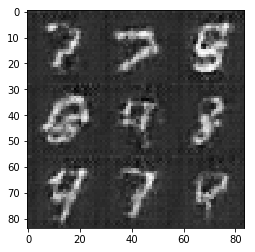

Epoch 1/2 ... Discriminator Loss: 0.2175 ... Generator Loss: 2.0988
Epoch 1/2 ... Discriminator Loss: 0.0916 ... Generator Loss: 2.9935
Epoch 1/2 ... Discriminator Loss: 0.1834 ... Generator Loss: 7.8371
Epoch 1/2 ... Discriminator Loss: 0.5941 ... Generator Loss: 2.6870
Epoch 1/2 ... Discriminator Loss: 0.4850 ... Generator Loss: 1.3384
Epoch 1/2 ... Discriminator Loss: 0.2170 ... Generator Loss: 2.1361
Epoch 1/2 ... Discriminator Loss: 0.1609 ... Generator Loss: 2.7183
Epoch 1/2 ... Discriminator Loss: 0.2067 ... Generator Loss: 2.2348
Epoch 1/2 ... Discriminator Loss: 0.0320 ... Generator Loss: 5.4787
Epoch 1/2 ... Discriminator Loss: 0.0584 ... Generator Loss: 4.5537


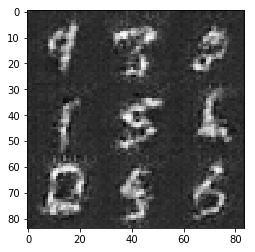

Epoch 1/2 ... Discriminator Loss: 0.4346 ... Generator Loss: 1.2616
Epoch 1/2 ... Discriminator Loss: 0.2940 ... Generator Loss: 1.5663
Epoch 1/2 ... Discriminator Loss: 0.3351 ... Generator Loss: 7.8275
Epoch 1/2 ... Discriminator Loss: 0.0721 ... Generator Loss: 3.6172
Epoch 1/2 ... Discriminator Loss: 0.1790 ... Generator Loss: 4.5935
Epoch 1/2 ... Discriminator Loss: 0.0412 ... Generator Loss: 3.9845
Epoch 1/2 ... Discriminator Loss: 0.6434 ... Generator Loss: 0.8983
Epoch 1/2 ... Discriminator Loss: 0.0396 ... Generator Loss: 4.3320
Epoch 1/2 ... Discriminator Loss: 0.0336 ... Generator Loss: 4.5632
Epoch 1/2 ... Discriminator Loss: 0.1783 ... Generator Loss: 5.1506


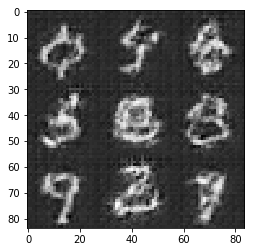

Epoch 1/2 ... Discriminator Loss: 0.0356 ... Generator Loss: 3.9631
Epoch 1/2 ... Discriminator Loss: 0.5751 ... Generator Loss: 0.9778
Epoch 1/2 ... Discriminator Loss: 3.3506 ... Generator Loss: 5.3383
Epoch 1/2 ... Discriminator Loss: 0.4760 ... Generator Loss: 1.5621
Epoch 1/2 ... Discriminator Loss: 0.3489 ... Generator Loss: 3.7071
Epoch 1/2 ... Discriminator Loss: 0.4158 ... Generator Loss: 1.3160
Epoch 1/2 ... Discriminator Loss: 0.0651 ... Generator Loss: 4.0010
Epoch 1/2 ... Discriminator Loss: 0.0786 ... Generator Loss: 3.6692
Epoch 1/2 ... Discriminator Loss: 0.0631 ... Generator Loss: 5.3239
Epoch 1/2 ... Discriminator Loss: 0.0328 ... Generator Loss: 7.7530


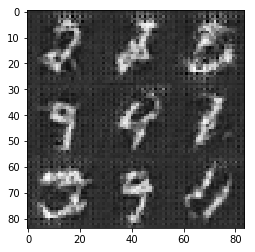

Epoch 1/2 ... Discriminator Loss: 0.1016 ... Generator Loss: 6.4798
Epoch 1/2 ... Discriminator Loss: 0.0623 ... Generator Loss: 3.5827
Epoch 1/2 ... Discriminator Loss: 0.0848 ... Generator Loss: 2.8208
Epoch 1/2 ... Discriminator Loss: 0.0287 ... Generator Loss: 5.4539
Epoch 1/2 ... Discriminator Loss: 0.0990 ... Generator Loss: 2.8911
Epoch 1/2 ... Discriminator Loss: 0.0290 ... Generator Loss: 4.6051
Epoch 1/2 ... Discriminator Loss: 0.1108 ... Generator Loss: 3.0808
Epoch 1/2 ... Discriminator Loss: 0.0183 ... Generator Loss: 5.4830
Epoch 1/2 ... Discriminator Loss: 0.0160 ... Generator Loss: 6.6683
Epoch 1/2 ... Discriminator Loss: 0.0064 ... Generator Loss: 6.9591


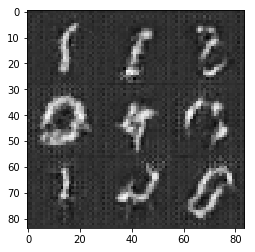

Epoch 1/2 ... Discriminator Loss: 0.0564 ... Generator Loss: 3.7273
Epoch 1/2 ... Discriminator Loss: 1.1066 ... Generator Loss: 2.4570
Epoch 1/2 ... Discriminator Loss: 0.2867 ... Generator Loss: 2.3785
Epoch 1/2 ... Discriminator Loss: 0.1812 ... Generator Loss: 2.8771
Epoch 1/2 ... Discriminator Loss: 0.2252 ... Generator Loss: 2.2267
Epoch 1/2 ... Discriminator Loss: 0.1068 ... Generator Loss: 3.5844
Epoch 1/2 ... Discriminator Loss: 0.0656 ... Generator Loss: 3.8431
Epoch 1/2 ... Discriminator Loss: 0.9468 ... Generator Loss: 0.5927
Epoch 1/2 ... Discriminator Loss: 0.1719 ... Generator Loss: 2.3632
Epoch 1/2 ... Discriminator Loss: 0.3066 ... Generator Loss: 1.6001


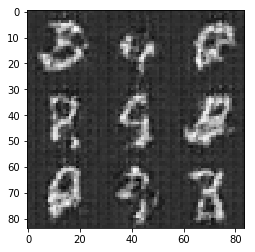

Epoch 1/2 ... Discriminator Loss: 0.4482 ... Generator Loss: 1.2574
Epoch 1/2 ... Discriminator Loss: 0.0457 ... Generator Loss: 6.2958
Epoch 1/2 ... Discriminator Loss: 0.0320 ... Generator Loss: 4.5291
Epoch 1/2 ... Discriminator Loss: 0.0319 ... Generator Loss: 4.4259
Epoch 1/2 ... Discriminator Loss: 0.0194 ... Generator Loss: 5.9403
Epoch 1/2 ... Discriminator Loss: 0.0194 ... Generator Loss: 5.4808
Epoch 1/2 ... Discriminator Loss: 0.0052 ... Generator Loss: 9.7922
Epoch 1/2 ... Discriminator Loss: 0.0111 ... Generator Loss: 6.9654
Epoch 1/2 ... Discriminator Loss: 0.1539 ... Generator Loss: 2.2507
Epoch 1/2 ... Discriminator Loss: 0.0293 ... Generator Loss: 7.4294


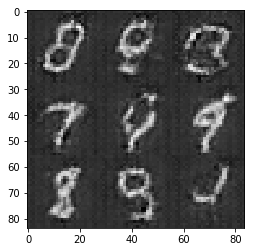

Epoch 1/2 ... Discriminator Loss: 1.8097 ... Generator Loss: 0.3554
Epoch 1/2 ... Discriminator Loss: 0.9324 ... Generator Loss: 1.4006
Epoch 1/2 ... Discriminator Loss: 0.6019 ... Generator Loss: 1.3953
Epoch 1/2 ... Discriminator Loss: 0.3432 ... Generator Loss: 1.7870
Epoch 1/2 ... Discriminator Loss: 1.3701 ... Generator Loss: 0.3905
Epoch 1/2 ... Discriminator Loss: 0.0616 ... Generator Loss: 4.8019
Epoch 1/2 ... Discriminator Loss: 0.0818 ... Generator Loss: 3.1267
Epoch 1/2 ... Discriminator Loss: 0.0926 ... Generator Loss: 3.8011
Epoch 1/2 ... Discriminator Loss: 0.0345 ... Generator Loss: 5.0320
Epoch 1/2 ... Discriminator Loss: 0.0309 ... Generator Loss: 4.4984


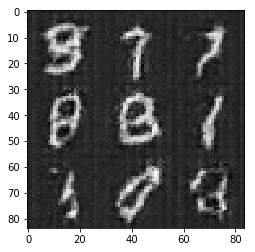

Epoch 1/2 ... Discriminator Loss: 0.0906 ... Generator Loss: 5.0915
Epoch 1/2 ... Discriminator Loss: 0.0396 ... Generator Loss: 4.5724
Epoch 1/2 ... Discriminator Loss: 0.0443 ... Generator Loss: 3.9079
Epoch 1/2 ... Discriminator Loss: 0.0528 ... Generator Loss: 8.8074
Epoch 1/2 ... Discriminator Loss: 0.0764 ... Generator Loss: 5.6265
Epoch 1/2 ... Discriminator Loss: 0.1247 ... Generator Loss: 4.6296
Epoch 1/2 ... Discriminator Loss: 0.2708 ... Generator Loss: 1.6814


In [12]:
batch_size = 64
z_dim = 100
learning_rate = 0.0002 #0.0005
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 0/1 ... Discriminator Loss: 0.2091 ... Generator Loss: 2.4898
Epoch 0/1 ... Discriminator Loss: 0.1486 ... Generator Loss: 2.7503
Epoch 0/1 ... Discriminator Loss: 0.0810 ... Generator Loss: 3.4092
Epoch 0/1 ... Discriminator Loss: 0.1519 ... Generator Loss: 4.9601
Epoch 0/1 ... Discriminator Loss: 0.1495 ... Generator Loss: 2.8603
Epoch 0/1 ... Discriminator Loss: 0.0408 ... Generator Loss: 4.7449
Epoch 0/1 ... Discriminator Loss: 1.2827 ... Generator Loss: 0.4346
Epoch 0/1 ... Discriminator Loss: 0.5406 ... Generator Loss: 1.3562
Epoch 0/1 ... Discriminator Loss: 0.2264 ... Generator Loss: 2.4275
Epoch 0/1 ... Discriminator Loss: 0.1201 ... Generator Loss: 2.9939


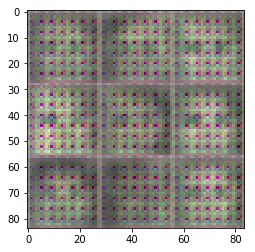

Epoch 0/1 ... Discriminator Loss: 0.0999 ... Generator Loss: 3.2495
Epoch 0/1 ... Discriminator Loss: 0.0395 ... Generator Loss: 4.0830
Epoch 0/1 ... Discriminator Loss: 0.0142 ... Generator Loss: 5.4087
Epoch 0/1 ... Discriminator Loss: 0.0244 ... Generator Loss: 5.0766
Epoch 0/1 ... Discriminator Loss: 0.0293 ... Generator Loss: 4.6670
Epoch 0/1 ... Discriminator Loss: 0.0210 ... Generator Loss: 4.6703
Epoch 0/1 ... Discriminator Loss: 0.0157 ... Generator Loss: 5.0683
Epoch 0/1 ... Discriminator Loss: 0.0171 ... Generator Loss: 4.8480
Epoch 0/1 ... Discriminator Loss: 0.0092 ... Generator Loss: 5.5463
Epoch 0/1 ... Discriminator Loss: 0.0093 ... Generator Loss: 5.0875


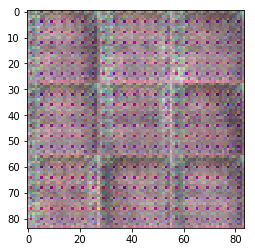

Epoch 0/1 ... Discriminator Loss: 0.0112 ... Generator Loss: 5.0893
Epoch 0/1 ... Discriminator Loss: 0.0074 ... Generator Loss: 5.7282
Epoch 0/1 ... Discriminator Loss: 0.0083 ... Generator Loss: 5.7996
Epoch 0/1 ... Discriminator Loss: 0.0057 ... Generator Loss: 5.5135
Epoch 0/1 ... Discriminator Loss: 0.0056 ... Generator Loss: 5.8459
Epoch 0/1 ... Discriminator Loss: 0.0059 ... Generator Loss: 5.8016
Epoch 0/1 ... Discriminator Loss: 0.0048 ... Generator Loss: 6.0582
Epoch 0/1 ... Discriminator Loss: 0.0047 ... Generator Loss: 6.0934
Epoch 0/1 ... Discriminator Loss: 0.0033 ... Generator Loss: 6.0561
Epoch 0/1 ... Discriminator Loss: 0.0045 ... Generator Loss: 6.0716


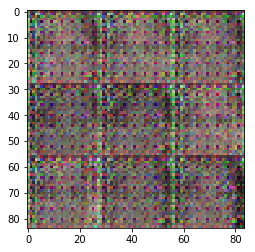

Epoch 0/1 ... Discriminator Loss: 0.0047 ... Generator Loss: 6.5485
Epoch 0/1 ... Discriminator Loss: 0.0023 ... Generator Loss: 6.5889
Epoch 0/1 ... Discriminator Loss: 0.0029 ... Generator Loss: 6.0943
Epoch 0/1 ... Discriminator Loss: 0.0023 ... Generator Loss: 6.2777
Epoch 0/1 ... Discriminator Loss: 0.0025 ... Generator Loss: 6.2500
Epoch 0/1 ... Discriminator Loss: 5.0696 ... Generator Loss: 0.2581
Epoch 0/1 ... Discriminator Loss: 1.1906 ... Generator Loss: 7.9757
Epoch 0/1 ... Discriminator Loss: 0.3040 ... Generator Loss: 2.7101
Epoch 0/1 ... Discriminator Loss: 0.1512 ... Generator Loss: 2.7421
Epoch 0/1 ... Discriminator Loss: 0.0606 ... Generator Loss: 12.0032


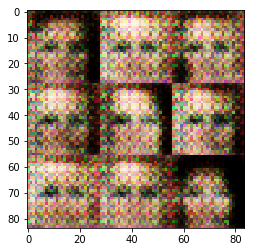

Epoch 0/1 ... Discriminator Loss: 0.0613 ... Generator Loss: 3.5428
Epoch 0/1 ... Discriminator Loss: 0.0768 ... Generator Loss: 3.2820
Epoch 0/1 ... Discriminator Loss: 0.1154 ... Generator Loss: 2.8173
Epoch 0/1 ... Discriminator Loss: 0.0089 ... Generator Loss: 6.2037
Epoch 0/1 ... Discriminator Loss: 0.2406 ... Generator Loss: 2.0396
Epoch 0/1 ... Discriminator Loss: 0.0225 ... Generator Loss: 7.8207
Epoch 0/1 ... Discriminator Loss: 0.0121 ... Generator Loss: 6.7319
Epoch 0/1 ... Discriminator Loss: 1.7486 ... Generator Loss: 7.2002
Epoch 0/1 ... Discriminator Loss: 1.1900 ... Generator Loss: 0.5695
Epoch 0/1 ... Discriminator Loss: 0.2174 ... Generator Loss: 4.9231


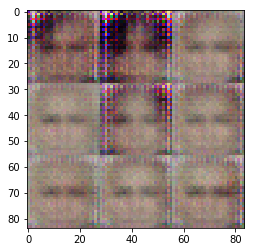

Epoch 0/1 ... Discriminator Loss: 0.1733 ... Generator Loss: 2.7646
Epoch 0/1 ... Discriminator Loss: 0.8319 ... Generator Loss: 0.8593
Epoch 0/1 ... Discriminator Loss: 0.4265 ... Generator Loss: 1.5510
Epoch 0/1 ... Discriminator Loss: 0.0748 ... Generator Loss: 3.2826
Epoch 0/1 ... Discriminator Loss: 0.0242 ... Generator Loss: 4.2332
Epoch 0/1 ... Discriminator Loss: 0.3013 ... Generator Loss: 2.7099
Epoch 0/1 ... Discriminator Loss: 1.1569 ... Generator Loss: 6.4792
Epoch 0/1 ... Discriminator Loss: 0.3791 ... Generator Loss: 6.1693
Epoch 0/1 ... Discriminator Loss: 0.4457 ... Generator Loss: 6.0922
Epoch 0/1 ... Discriminator Loss: 0.1350 ... Generator Loss: 3.8589


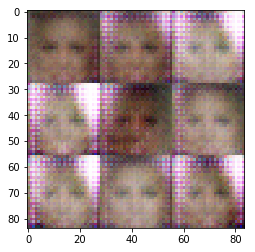

Epoch 0/1 ... Discriminator Loss: 0.4722 ... Generator Loss: 1.6813
Epoch 0/1 ... Discriminator Loss: 0.0288 ... Generator Loss: 6.4079
Epoch 0/1 ... Discriminator Loss: 0.3700 ... Generator Loss: 1.5917
Epoch 0/1 ... Discriminator Loss: 0.0569 ... Generator Loss: 5.4628
Epoch 0/1 ... Discriminator Loss: 0.2654 ... Generator Loss: 2.4827
Epoch 0/1 ... Discriminator Loss: 3.4249 ... Generator Loss: 4.5137
Epoch 0/1 ... Discriminator Loss: 0.2414 ... Generator Loss: 2.8363
Epoch 0/1 ... Discriminator Loss: 1.4566 ... Generator Loss: 4.7939
Epoch 0/1 ... Discriminator Loss: 0.0306 ... Generator Loss: 6.2253
Epoch 0/1 ... Discriminator Loss: 0.0152 ... Generator Loss: 9.4801


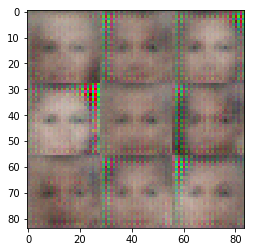

Epoch 0/1 ... Discriminator Loss: 0.3468 ... Generator Loss: 1.7340
Epoch 0/1 ... Discriminator Loss: 0.1377 ... Generator Loss: 2.9486
Epoch 0/1 ... Discriminator Loss: 0.0464 ... Generator Loss: 4.3422
Epoch 0/1 ... Discriminator Loss: 0.0171 ... Generator Loss: 7.6696
Epoch 0/1 ... Discriminator Loss: 0.0759 ... Generator Loss: 4.1525
Epoch 0/1 ... Discriminator Loss: 0.1551 ... Generator Loss: 2.6145
Epoch 0/1 ... Discriminator Loss: 0.1084 ... Generator Loss: 5.3568
Epoch 0/1 ... Discriminator Loss: 0.2209 ... Generator Loss: 2.0454
Epoch 0/1 ... Discriminator Loss: 0.0822 ... Generator Loss: 3.3428
Epoch 0/1 ... Discriminator Loss: 1.3857 ... Generator Loss: 0.4191


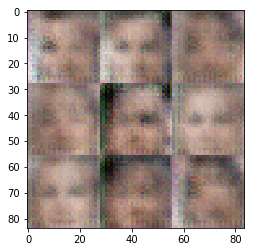

Epoch 0/1 ... Discriminator Loss: 0.7877 ... Generator Loss: 1.0298
Epoch 0/1 ... Discriminator Loss: 0.9829 ... Generator Loss: 1.0547
Epoch 0/1 ... Discriminator Loss: 0.1367 ... Generator Loss: 5.5641
Epoch 0/1 ... Discriminator Loss: 0.0503 ... Generator Loss: 5.4798
Epoch 0/1 ... Discriminator Loss: 0.3295 ... Generator Loss: 2.7605
Epoch 0/1 ... Discriminator Loss: 0.4806 ... Generator Loss: 2.1578
Epoch 0/1 ... Discriminator Loss: 0.4528 ... Generator Loss: 1.4900
Epoch 0/1 ... Discriminator Loss: 0.0163 ... Generator Loss: 6.4567
Epoch 0/1 ... Discriminator Loss: 0.0509 ... Generator Loss: 4.8185
Epoch 0/1 ... Discriminator Loss: 0.0310 ... Generator Loss: 7.8629


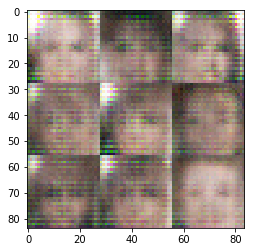

Epoch 0/1 ... Discriminator Loss: 0.0467 ... Generator Loss: 4.7859
Epoch 0/1 ... Discriminator Loss: 0.6492 ... Generator Loss: 1.3506
Epoch 0/1 ... Discriminator Loss: 0.1117 ... Generator Loss: 6.3198
Epoch 0/1 ... Discriminator Loss: 0.0569 ... Generator Loss: 6.3139
Epoch 0/1 ... Discriminator Loss: 0.1857 ... Generator Loss: 2.2421
Epoch 0/1 ... Discriminator Loss: 0.0099 ... Generator Loss: 5.9922
Epoch 0/1 ... Discriminator Loss: 0.0208 ... Generator Loss: 11.1586
Epoch 0/1 ... Discriminator Loss: 0.0717 ... Generator Loss: 3.9171
Epoch 0/1 ... Discriminator Loss: 0.0153 ... Generator Loss: 5.8484
Epoch 0/1 ... Discriminator Loss: 0.8606 ... Generator Loss: 0.8499


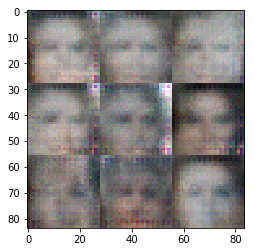

Epoch 0/1 ... Discriminator Loss: 0.1678 ... Generator Loss: 2.1817
Epoch 0/1 ... Discriminator Loss: 1.8869 ... Generator Loss: 0.3187
Epoch 0/1 ... Discriminator Loss: 2.8414 ... Generator Loss: 0.1214
Epoch 0/1 ... Discriminator Loss: 0.0178 ... Generator Loss: 10.5192
Epoch 0/1 ... Discriminator Loss: 0.4342 ... Generator Loss: 2.1317
Epoch 0/1 ... Discriminator Loss: 0.1611 ... Generator Loss: 2.6164
Epoch 0/1 ... Discriminator Loss: 0.0210 ... Generator Loss: 7.2315
Epoch 0/1 ... Discriminator Loss: 0.0535 ... Generator Loss: 4.1169
Epoch 0/1 ... Discriminator Loss: 0.0753 ... Generator Loss: 3.3590
Epoch 0/1 ... Discriminator Loss: 0.1965 ... Generator Loss: 4.4145


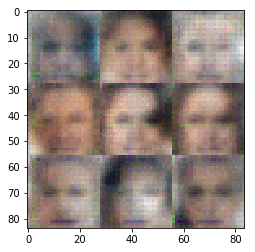

Epoch 0/1 ... Discriminator Loss: 0.2964 ... Generator Loss: 3.2348
Epoch 0/1 ... Discriminator Loss: 0.0109 ... Generator Loss: 7.0481
Epoch 0/1 ... Discriminator Loss: 0.0263 ... Generator Loss: 9.4655
Epoch 0/1 ... Discriminator Loss: 0.4164 ... Generator Loss: 1.3939
Epoch 0/1 ... Discriminator Loss: 0.1269 ... Generator Loss: 5.2412
Epoch 0/1 ... Discriminator Loss: 0.1482 ... Generator Loss: 5.5783
Epoch 0/1 ... Discriminator Loss: 0.3263 ... Generator Loss: 2.4091
Epoch 0/1 ... Discriminator Loss: 0.7285 ... Generator Loss: 2.2635
Epoch 0/1 ... Discriminator Loss: 0.3391 ... Generator Loss: 1.6315
Epoch 0/1 ... Discriminator Loss: 0.6644 ... Generator Loss: 1.0350


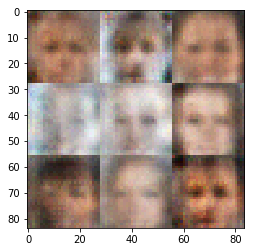

Epoch 0/1 ... Discriminator Loss: 0.0441 ... Generator Loss: 9.7227
Epoch 0/1 ... Discriminator Loss: 1.1586 ... Generator Loss: 3.9464
Epoch 0/1 ... Discriminator Loss: 0.3034 ... Generator Loss: 1.5609
Epoch 0/1 ... Discriminator Loss: 0.0098 ... Generator Loss: 9.6236
Epoch 0/1 ... Discriminator Loss: 0.1797 ... Generator Loss: 2.1294
Epoch 0/1 ... Discriminator Loss: 2.6462 ... Generator Loss: 4.5575
Epoch 0/1 ... Discriminator Loss: 0.1115 ... Generator Loss: 2.7230
Epoch 0/1 ... Discriminator Loss: 0.6673 ... Generator Loss: 0.9318
Epoch 0/1 ... Discriminator Loss: 1.3024 ... Generator Loss: 0.4668
Epoch 0/1 ... Discriminator Loss: 0.1481 ... Generator Loss: 4.3860


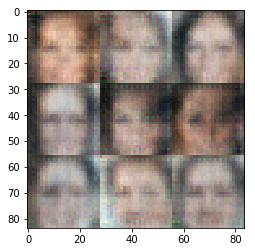

Epoch 0/1 ... Discriminator Loss: 0.2701 ... Generator Loss: 1.6539
Epoch 0/1 ... Discriminator Loss: 0.0360 ... Generator Loss: 7.4192
Epoch 0/1 ... Discriminator Loss: 0.0313 ... Generator Loss: 4.8216
Epoch 0/1 ... Discriminator Loss: 0.0075 ... Generator Loss: 5.8077
Epoch 0/1 ... Discriminator Loss: 0.0138 ... Generator Loss: 6.3887
Epoch 0/1 ... Discriminator Loss: 0.0532 ... Generator Loss: 4.0526
Epoch 0/1 ... Discriminator Loss: 0.8416 ... Generator Loss: 0.8142
Epoch 0/1 ... Discriminator Loss: 0.7124 ... Generator Loss: 1.3900
Epoch 0/1 ... Discriminator Loss: 0.0633 ... Generator Loss: 3.2956
Epoch 0/1 ... Discriminator Loss: 0.5940 ... Generator Loss: 1.1258


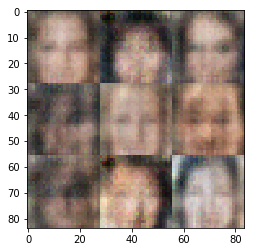

Epoch 0/1 ... Discriminator Loss: 0.0095 ... Generator Loss: 6.6435
Epoch 0/1 ... Discriminator Loss: 0.0799 ... Generator Loss: 8.6671
Epoch 0/1 ... Discriminator Loss: 0.0280 ... Generator Loss: 5.6255
Epoch 0/1 ... Discriminator Loss: 0.5936 ... Generator Loss: 1.0484
Epoch 0/1 ... Discriminator Loss: 1.7358 ... Generator Loss: 0.2415
Epoch 0/1 ... Discriminator Loss: 0.7459 ... Generator Loss: 0.7265
Epoch 0/1 ... Discriminator Loss: 0.2884 ... Generator Loss: 1.6305
Epoch 0/1 ... Discriminator Loss: 0.0227 ... Generator Loss: 5.1147
Epoch 0/1 ... Discriminator Loss: 0.1505 ... Generator Loss: 2.2916
Epoch 0/1 ... Discriminator Loss: 0.0043 ... Generator Loss: 10.1532


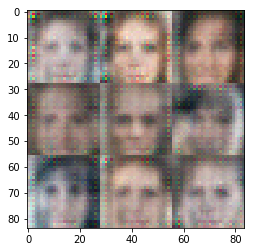

Epoch 0/1 ... Discriminator Loss: 1.0113 ... Generator Loss: 0.5171
Epoch 0/1 ... Discriminator Loss: 0.0106 ... Generator Loss: 9.5832
Epoch 0/1 ... Discriminator Loss: 0.0609 ... Generator Loss: 3.3996
Epoch 0/1 ... Discriminator Loss: 0.0502 ... Generator Loss: 3.8713
Epoch 0/1 ... Discriminator Loss: 0.0184 ... Generator Loss: 11.6509
Epoch 0/1 ... Discriminator Loss: 1.5882 ... Generator Loss: 2.1068
Epoch 0/1 ... Discriminator Loss: 0.1587 ... Generator Loss: 2.6691
Epoch 0/1 ... Discriminator Loss: 0.7312 ... Generator Loss: 0.8368
Epoch 0/1 ... Discriminator Loss: 0.0231 ... Generator Loss: 13.0150
Epoch 0/1 ... Discriminator Loss: 1.0832 ... Generator Loss: 0.6489


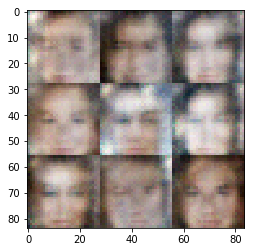

Epoch 0/1 ... Discriminator Loss: 0.0175 ... Generator Loss: 9.1756
Epoch 0/1 ... Discriminator Loss: 1.6018 ... Generator Loss: 3.6580
Epoch 0/1 ... Discriminator Loss: 0.0524 ... Generator Loss: 14.5303
Epoch 0/1 ... Discriminator Loss: 0.1794 ... Generator Loss: 2.0978
Epoch 0/1 ... Discriminator Loss: 0.0238 ... Generator Loss: 8.9463
Epoch 0/1 ... Discriminator Loss: 0.0236 ... Generator Loss: 4.5612
Epoch 0/1 ... Discriminator Loss: 0.0060 ... Generator Loss: 6.2155
Epoch 0/1 ... Discriminator Loss: 0.0565 ... Generator Loss: 3.5699
Epoch 0/1 ... Discriminator Loss: 0.0047 ... Generator Loss: 11.0937
Epoch 0/1 ... Discriminator Loss: 0.0254 ... Generator Loss: 4.7520


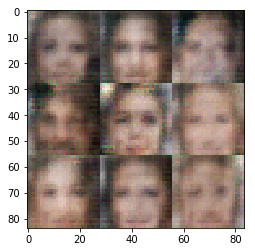

Epoch 0/1 ... Discriminator Loss: 0.4380 ... Generator Loss: 4.8351
Epoch 0/1 ... Discriminator Loss: 0.0332 ... Generator Loss: 6.1822
Epoch 0/1 ... Discriminator Loss: 0.2521 ... Generator Loss: 2.3698
Epoch 0/1 ... Discriminator Loss: 0.0330 ... Generator Loss: 9.5639
Epoch 0/1 ... Discriminator Loss: 0.0082 ... Generator Loss: 13.2445
Epoch 0/1 ... Discriminator Loss: 1.2310 ... Generator Loss: 3.1670
Epoch 0/1 ... Discriminator Loss: 0.0054 ... Generator Loss: 11.2617
Epoch 0/1 ... Discriminator Loss: 0.1947 ... Generator Loss: 2.1552
Epoch 0/1 ... Discriminator Loss: 0.1073 ... Generator Loss: 2.5858
Epoch 0/1 ... Discriminator Loss: 0.0067 ... Generator Loss: 6.2003


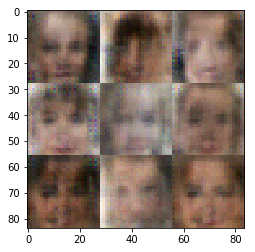

Epoch 0/1 ... Discriminator Loss: 0.1364 ... Generator Loss: 2.2098
Epoch 0/1 ... Discriminator Loss: 0.0073 ... Generator Loss: 6.4003
Epoch 0/1 ... Discriminator Loss: 0.2834 ... Generator Loss: 10.7803
Epoch 0/1 ... Discriminator Loss: 0.2930 ... Generator Loss: 1.7073
Epoch 0/1 ... Discriminator Loss: 0.0068 ... Generator Loss: 9.6658
Epoch 0/1 ... Discriminator Loss: 0.0326 ... Generator Loss: 10.3504
Epoch 0/1 ... Discriminator Loss: 0.0057 ... Generator Loss: 8.6922
Epoch 0/1 ... Discriminator Loss: 0.0269 ... Generator Loss: 13.3365
Epoch 0/1 ... Discriminator Loss: 0.0250 ... Generator Loss: 6.6826
Epoch 0/1 ... Discriminator Loss: 0.0142 ... Generator Loss: 5.5735


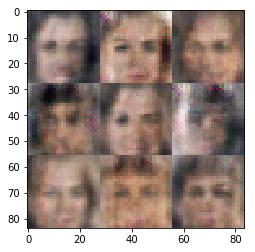

Epoch 0/1 ... Discriminator Loss: 0.0099 ... Generator Loss: 7.0702
Epoch 0/1 ... Discriminator Loss: 0.4332 ... Generator Loss: 12.4262
Epoch 0/1 ... Discriminator Loss: 0.0032 ... Generator Loss: 7.6713
Epoch 0/1 ... Discriminator Loss: 0.4423 ... Generator Loss: 1.2454
Epoch 0/1 ... Discriminator Loss: 0.0068 ... Generator Loss: 11.1462
Epoch 0/1 ... Discriminator Loss: 0.0023 ... Generator Loss: 9.0124
Epoch 0/1 ... Discriminator Loss: 0.0418 ... Generator Loss: 3.5852
Epoch 0/1 ... Discriminator Loss: 0.0054 ... Generator Loss: 6.8767
Epoch 0/1 ... Discriminator Loss: 0.0915 ... Generator Loss: 6.0240
Epoch 0/1 ... Discriminator Loss: 0.0026 ... Generator Loss: 8.7037


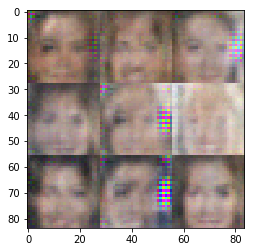

Epoch 0/1 ... Discriminator Loss: 0.0037 ... Generator Loss: 8.9195
Epoch 0/1 ... Discriminator Loss: 0.0057 ... Generator Loss: 7.4539
Epoch 0/1 ... Discriminator Loss: 0.0030 ... Generator Loss: 10.6787
Epoch 0/1 ... Discriminator Loss: 0.0113 ... Generator Loss: 12.5239
Epoch 0/1 ... Discriminator Loss: 0.0071 ... Generator Loss: 9.0312
Epoch 0/1 ... Discriminator Loss: 0.0107 ... Generator Loss: 8.7763
Epoch 0/1 ... Discriminator Loss: 0.0029 ... Generator Loss: 8.7781
Epoch 0/1 ... Discriminator Loss: 0.0164 ... Generator Loss: 5.0043
Epoch 0/1 ... Discriminator Loss: 0.0079 ... Generator Loss: 10.1550
Epoch 0/1 ... Discriminator Loss: 0.0077 ... Generator Loss: 8.2478


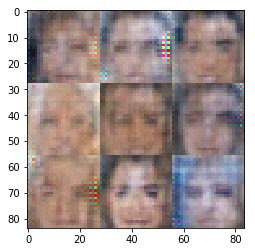

Epoch 0/1 ... Discriminator Loss: 0.0021 ... Generator Loss: 7.6053
Epoch 0/1 ... Discriminator Loss: 0.0045 ... Generator Loss: 9.3144
Epoch 0/1 ... Discriminator Loss: 0.0051 ... Generator Loss: 11.3418
Epoch 0/1 ... Discriminator Loss: 0.0057 ... Generator Loss: 7.2979
Epoch 0/1 ... Discriminator Loss: 0.0020 ... Generator Loss: 8.0037
Epoch 0/1 ... Discriminator Loss: 0.0013 ... Generator Loss: 10.5569
Epoch 0/1 ... Discriminator Loss: 0.0042 ... Generator Loss: 6.7555
Epoch 0/1 ... Discriminator Loss: 0.0024 ... Generator Loss: 9.6475
Epoch 0/1 ... Discriminator Loss: 0.0138 ... Generator Loss: 5.4125
Epoch 0/1 ... Discriminator Loss: 0.0245 ... Generator Loss: 4.9538


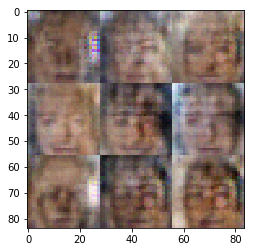

Epoch 0/1 ... Discriminator Loss: 0.0146 ... Generator Loss: 8.9970
Epoch 0/1 ... Discriminator Loss: 0.0070 ... Generator Loss: 10.4951
Epoch 0/1 ... Discriminator Loss: 0.0027 ... Generator Loss: 7.7134
Epoch 0/1 ... Discriminator Loss: 0.0181 ... Generator Loss: 4.6191
Epoch 0/1 ... Discriminator Loss: 0.0042 ... Generator Loss: 9.1146
Epoch 0/1 ... Discriminator Loss: 0.2042 ... Generator Loss: 2.1108
Epoch 0/1 ... Discriminator Loss: 0.0093 ... Generator Loss: 5.4131
Epoch 0/1 ... Discriminator Loss: 0.0143 ... Generator Loss: 4.9957
Epoch 0/1 ... Discriminator Loss: 0.0120 ... Generator Loss: 5.0150
Epoch 0/1 ... Discriminator Loss: 0.0038 ... Generator Loss: 9.0070


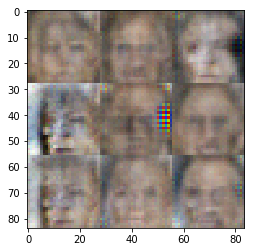

Epoch 0/1 ... Discriminator Loss: 0.0112 ... Generator Loss: 9.7308
Epoch 0/1 ... Discriminator Loss: 0.0025 ... Generator Loss: 7.6590
Epoch 0/1 ... Discriminator Loss: 0.0047 ... Generator Loss: 11.0589
Epoch 0/1 ... Discriminator Loss: 0.0033 ... Generator Loss: 6.2712
Epoch 0/1 ... Discriminator Loss: 0.0083 ... Generator Loss: 7.5265
Epoch 0/1 ... Discriminator Loss: 0.0154 ... Generator Loss: 9.7181
Epoch 0/1 ... Discriminator Loss: 0.0120 ... Generator Loss: 5.4676
Epoch 0/1 ... Discriminator Loss: 0.0133 ... Generator Loss: 4.8393
Epoch 0/1 ... Discriminator Loss: 0.0031 ... Generator Loss: 8.2365
Epoch 0/1 ... Discriminator Loss: 0.4997 ... Generator Loss: 1.7316


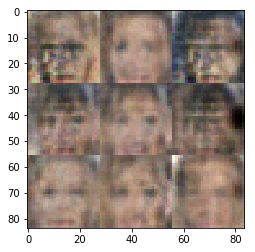

Epoch 0/1 ... Discriminator Loss: 0.0034 ... Generator Loss: 8.7197
Epoch 0/1 ... Discriminator Loss: 0.3360 ... Generator Loss: 2.6262
Epoch 0/1 ... Discriminator Loss: 0.5184 ... Generator Loss: 5.4516
Epoch 0/1 ... Discriminator Loss: 0.1093 ... Generator Loss: 2.9655
Epoch 0/1 ... Discriminator Loss: 0.0519 ... Generator Loss: 3.7715
Epoch 0/1 ... Discriminator Loss: 0.0026 ... Generator Loss: 9.6839
Epoch 0/1 ... Discriminator Loss: 0.0537 ... Generator Loss: 3.6401
Epoch 0/1 ... Discriminator Loss: 0.2239 ... Generator Loss: 1.9658
Epoch 0/1 ... Discriminator Loss: 0.0138 ... Generator Loss: 5.9691
Epoch 0/1 ... Discriminator Loss: 0.0100 ... Generator Loss: 9.8124


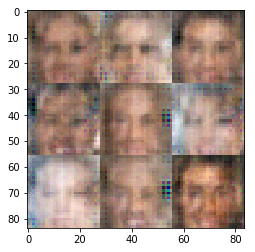

Epoch 0/1 ... Discriminator Loss: 0.0045 ... Generator Loss: 11.0098
Epoch 0/1 ... Discriminator Loss: 0.0090 ... Generator Loss: 6.5139
Epoch 0/1 ... Discriminator Loss: 0.3561 ... Generator Loss: 3.6800
Epoch 0/1 ... Discriminator Loss: 0.0838 ... Generator Loss: 3.2480
Epoch 0/1 ... Discriminator Loss: 0.3524 ... Generator Loss: 9.8635
Epoch 0/1 ... Discriminator Loss: 0.0828 ... Generator Loss: 10.0614
Epoch 0/1 ... Discriminator Loss: 0.0049 ... Generator Loss: 6.7626
Epoch 0/1 ... Discriminator Loss: 0.4008 ... Generator Loss: 1.4457
Epoch 0/1 ... Discriminator Loss: 0.0025 ... Generator Loss: 8.6313
Epoch 0/1 ... Discriminator Loss: 0.0135 ... Generator Loss: 6.1537


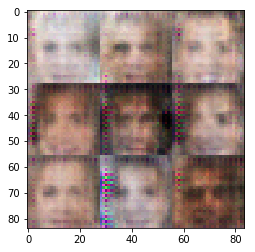

Epoch 0/1 ... Discriminator Loss: 0.0892 ... Generator Loss: 6.8802
Epoch 0/1 ... Discriminator Loss: 0.0062 ... Generator Loss: 7.2242
Epoch 0/1 ... Discriminator Loss: 1.0487 ... Generator Loss: 0.5442
Epoch 0/1 ... Discriminator Loss: 0.0215 ... Generator Loss: 10.9994
Epoch 0/1 ... Discriminator Loss: 2.1142 ... Generator Loss: 8.1999
Epoch 0/1 ... Discriminator Loss: 0.1355 ... Generator Loss: 2.5838
Epoch 0/1 ... Discriminator Loss: 2.5330 ... Generator Loss: 6.9632
Epoch 0/1 ... Discriminator Loss: 0.1083 ... Generator Loss: 2.8534
Epoch 0/1 ... Discriminator Loss: 0.0044 ... Generator Loss: 10.4079
Epoch 0/1 ... Discriminator Loss: 0.0060 ... Generator Loss: 6.6500


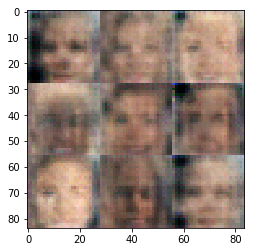

Epoch 0/1 ... Discriminator Loss: 0.0282 ... Generator Loss: 12.5874
Epoch 0/1 ... Discriminator Loss: 0.0165 ... Generator Loss: 4.8294
Epoch 0/1 ... Discriminator Loss: 0.0181 ... Generator Loss: 11.7625
Epoch 0/1 ... Discriminator Loss: 0.0238 ... Generator Loss: 4.2968
Epoch 0/1 ... Discriminator Loss: 0.1414 ... Generator Loss: 2.5455
Epoch 0/1 ... Discriminator Loss: 0.0347 ... Generator Loss: 5.9063
Epoch 0/1 ... Discriminator Loss: 0.0633 ... Generator Loss: 3.4191
Epoch 0/1 ... Discriminator Loss: 0.0060 ... Generator Loss: 7.8090
Epoch 0/1 ... Discriminator Loss: 0.0459 ... Generator Loss: 3.8329
Epoch 0/1 ... Discriminator Loss: 0.0474 ... Generator Loss: 4.4233


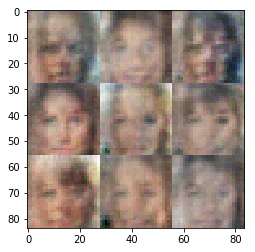

Epoch 0/1 ... Discriminator Loss: 0.0269 ... Generator Loss: 5.6113
Epoch 0/1 ... Discriminator Loss: 1.0871 ... Generator Loss: 1.0056
Epoch 0/1 ... Discriminator Loss: 0.2290 ... Generator Loss: 2.3913
Epoch 0/1 ... Discriminator Loss: 0.2998 ... Generator Loss: 1.7355
Epoch 0/1 ... Discriminator Loss: 0.2246 ... Generator Loss: 2.9547
Epoch 0/1 ... Discriminator Loss: 0.0173 ... Generator Loss: 7.7922
Epoch 0/1 ... Discriminator Loss: 0.0438 ... Generator Loss: 5.7870
Epoch 0/1 ... Discriminator Loss: 0.0181 ... Generator Loss: 8.0464
Epoch 0/1 ... Discriminator Loss: 0.0239 ... Generator Loss: 12.1587
Epoch 0/1 ... Discriminator Loss: 0.0611 ... Generator Loss: 9.9214


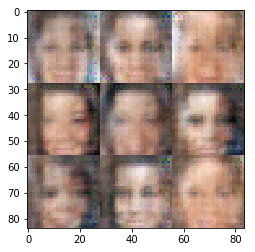

Epoch 0/1 ... Discriminator Loss: 0.0068 ... Generator Loss: 8.4040
Epoch 0/1 ... Discriminator Loss: 0.1508 ... Generator Loss: 2.3868
Epoch 0/1 ... Discriminator Loss: 0.1750 ... Generator Loss: 2.2452
Epoch 0/1 ... Discriminator Loss: 0.0085 ... Generator Loss: 8.4770
Epoch 0/1 ... Discriminator Loss: 0.3556 ... Generator Loss: 1.5387
Epoch 0/1 ... Discriminator Loss: 0.0279 ... Generator Loss: 6.3629
Epoch 0/1 ... Discriminator Loss: 0.0369 ... Generator Loss: 4.8940
Epoch 0/1 ... Discriminator Loss: 0.0621 ... Generator Loss: 3.2614
Epoch 0/1 ... Discriminator Loss: 0.0049 ... Generator Loss: 11.6700
Epoch 0/1 ... Discriminator Loss: 0.0671 ... Generator Loss: 3.4157


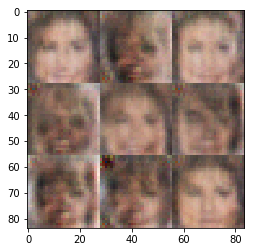

Epoch 0/1 ... Discriminator Loss: 0.0055 ... Generator Loss: 8.7521
Epoch 0/1 ... Discriminator Loss: 0.0150 ... Generator Loss: 7.4796
Epoch 0/1 ... Discriminator Loss: 0.0337 ... Generator Loss: 3.9724
Epoch 0/1 ... Discriminator Loss: 0.0102 ... Generator Loss: 5.2495
Epoch 0/1 ... Discriminator Loss: 0.0080 ... Generator Loss: 9.6575
Epoch 0/1 ... Discriminator Loss: 0.0298 ... Generator Loss: 3.9195
Epoch 0/1 ... Discriminator Loss: 0.0113 ... Generator Loss: 5.6445
Epoch 0/1 ... Discriminator Loss: 0.0136 ... Generator Loss: 6.8329
Epoch 0/1 ... Discriminator Loss: 0.0089 ... Generator Loss: 6.5140
Epoch 0/1 ... Discriminator Loss: 0.0053 ... Generator Loss: 10.3966


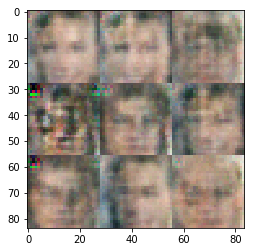

Epoch 0/1 ... Discriminator Loss: 0.0158 ... Generator Loss: 10.0660
Epoch 0/1 ... Discriminator Loss: 0.0097 ... Generator Loss: 6.9947
Epoch 0/1 ... Discriminator Loss: 0.0650 ... Generator Loss: 3.0744
Epoch 0/1 ... Discriminator Loss: 0.0206 ... Generator Loss: 4.3584
Epoch 0/1 ... Discriminator Loss: 0.0094 ... Generator Loss: 5.3974
Epoch 0/1 ... Discriminator Loss: 0.0274 ... Generator Loss: 5.4132


In [14]:
batch_size = 64
z_dim = 100
learning_rate = 0.0002 #0.0005
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.